# Multiscale Entropy

This notebooks runs multiscale entropy metrics on time series signals

This notebook includes:
- multiscale approximate entropy
- multiscale sample entropy
- multiscale permutation entropy
- multiscale weighted permutation entropy

In [1]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims_load
from apm.run import run_sims_parallel as run_sims
from apm.methods import multi_sample_entropy, multi_app_entropy, multi_perm_entropy, multi_wperm_entropy
from apm.methods.settings import (MULTI_AP_ENT_PARAMS, MULTI_SA_ENT_PARAMS,
                                  MULTI_PE_ENT_PARAMS, MULTI_WPE_ENT_PARAMS)
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims
from apm.plts.settings import EXT, COLORS
from apm.sim.settings import (N_SIMS, EXP, EXPS, KNEES, FREQS, POWERS, BWS,
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE)
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Custom settings
N_SIMS = 10

In [5]:
# Check settings for entropy measures
print('Multiscale Approximate Entropy:\t\t', MULTI_AP_ENT_PARAMS)
print('Multiscale Sample Entropy:\t\t', MULTI_SA_ENT_PARAMS)
print('Multiscale Permutation Entropy:\t\t', MULTI_PE_ENT_PARAMS)
print('Multiscale WPermutation Entropy:\t', MULTI_PE_ENT_PARAMS)

Multiscale Approximate Entropy:		 {}
Multiscale Sample Entropy:		 {}
Multiscale Permutation Entropy:		 {}
Multiscale WPermutation Entropy:	 {}


In [6]:
# Set the random seed
set_random_seed(111)

In [7]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '36_multiscale'

In [8]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

## Calculating Multiscale Entropy Measures on Example Signals

In [9]:
print('Computed multiscale approximate entropy:')
print('  powerlaw: \t {:1.4f}'.format(multi_app_entropy(SIG_AP, **MULTI_AP_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(multi_app_entropy(SIG_OSC, **MULTI_AP_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(multi_app_entropy(SIG_COMB, **MULTI_AP_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(multi_app_entropy(SIG_KN, **MULTI_AP_ENT_PARAMS)))

Computed multiscale approximate entropy:
  powerlaw: 	 0.1413
  osc:      	 0.0057
  combined: 	 0.2844
  knee:     	 0.4549


In [10]:
print('Computed multiscale sample entropy:')
print('  powerlaw: \t {:1.4f}'.format(multi_sample_entropy(SIG_AP, **MULTI_SA_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(multi_sample_entropy(SIG_OSC, **MULTI_SA_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(multi_sample_entropy(SIG_COMB, **MULTI_SA_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(multi_sample_entropy(SIG_KN, **MULTI_SA_ENT_PARAMS)))

Computed multiscale sample entropy:
  powerlaw: 	 1.3756
  osc:      	 0.0061
  combined: 	 0.5714
  knee:     	 0.5307


In [11]:
print('Computed multiscale permutation entropy:')
print('  powerlaw: \t {:1.4f}'.format(multi_perm_entropy(SIG_AP, **MULTI_PE_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(multi_perm_entropy(SIG_OSC, **MULTI_PE_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(multi_perm_entropy(SIG_COMB, **MULTI_PE_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(multi_perm_entropy(SIG_KN, **MULTI_PE_ENT_PARAMS)))

Computed multiscale permutation entropy:
  powerlaw: 	 0.9224
  osc:      	 0.8027
  combined: 	 0.9466
  knee:     	 0.9491


In [12]:
print('Computed multiscale weighted permutation entropy:')
print('  powerlaw: \t {:1.4f}'.format(multi_wperm_entropy(SIG_AP, **MULTI_WPE_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(multi_wperm_entropy(SIG_OSC, **MULTI_WPE_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(multi_wperm_entropy(SIG_COMB, **MULTI_WPE_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(multi_wperm_entropy(SIG_KN, **MULTI_WPE_ENT_PARAMS)))

Computed multiscale weighted permutation entropy:
  powerlaw: 	 0.7687


/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurokit2/complexity/entropy_permutation.py:180: RuntimeWarning: invalid value encountered in divide
  freq = freq / info["Weights"].sum()


  osc:      	 0.6996
  combined: 	 0.9047
  knee:     	 0.9263


## Multiscale Approximate Entropy


#### Aperiodic Variations

In [13]:
# Run simulations calculating multiscale approximate entropy across exponents
m_ap_sims_exp, m_ap_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, multi_app_entropy, 
    MULTI_AP_ENT_PARAMS, 'update_exp', EXPS, N_SIMS)

In [14]:
# Run simulations calculating multiscale approximate entropy across exponents, with an oscillation
m_ap_sims_comb, m_ap_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_app_entropy, 
    MULTI_AP_ENT_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

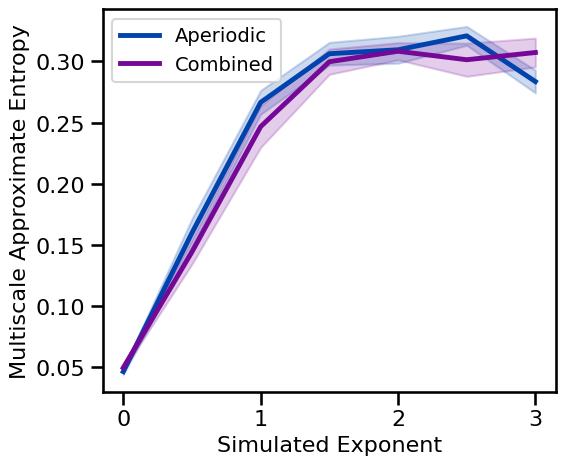

In [15]:
# Plot multiscale approximate entropy measures across aperiodic variations
plot_ap_sims(m_ap_sims_exp, m_ap_sims_exp_var, m_ap_sims_comb, m_ap_sims_exp_comb_var,
             'Multiscale Approximate Entropy', save_fig=SAVE_FIG, 
             file_name='m_ap_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [16]:
# Run simulations calculating multiscale approximate entropy across oscillation frequency
m_ap_sims_freq, m_ap_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_app_entropy, 
    MULTI_AP_ENT_PARAMS, 'update_freq', FREQS, N_SIMS)

In [17]:
# Run simulations calculating multiscale approximate entropy across oscillation power
m_ap_sims_pow, m_ap_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_app_entropy, 
    MULTI_AP_ENT_PARAMS, 'update_pow', POWERS, N_SIMS)

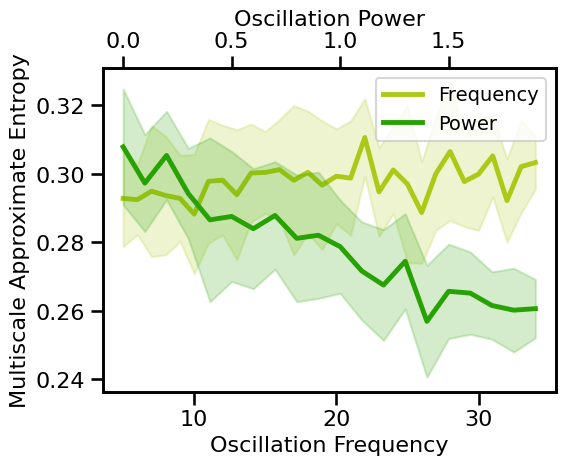

In [18]:
# Plot multiscale approximate entropy measures across aperiodic variations
plot_pe_sims(m_ap_sims_freq, m_ap_sims_freq_var, m_ap_sims_pow, m_ap_sims_pow_var,
             'Multiscale Approximate Entropy', save_fig=SAVE_FIG, 
             file_name='m_ap_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [19]:
# Run simulations calculating multiscale approximate entropy across timescales
m_ap_sims_knee, m_ap_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, multi_app_entropy, 
    MULTI_AP_ENT_PARAMS, 'update_knee', KNEES, N_SIMS)

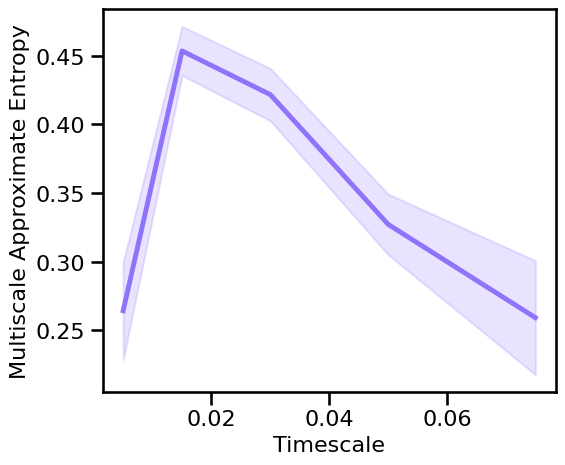

In [20]:
# Plot multiscale approximate entropy across different timescales
plot_sims(KNEES, m_ap_sims_knee, m_ap_sims_knee_var,
          'Timescale', 'Multiscale Approximate Entropy', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='m_ap_knee' + EXT, file_path=FIGPATH)

#### Peak Variations

In [21]:
# Run simulations calculating multiscale approximate entropy across peak bandwidths (sims from file)
m_ap_sims_bw, m_ap_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', multi_app_entropy, MULTI_AP_ENT_PARAMS)

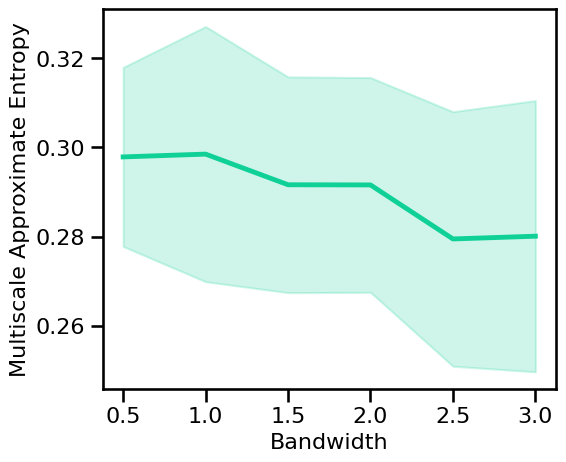

In [22]:
# Plot multiscale approximate entropy across peak bandwidth
plot_sims(BWS, m_ap_sims_bw, m_ap_sims_bw_var,
          'Bandwidth', 'Multiscale Approximate Entropy', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='m_ap_bw' + EXT, file_path=FIGPATH)

## Multiscale Sample Entropy

#### Aperiodic Variations

In [23]:
# Run simulations calculating multiscale sample entropy across exponents
m_sa_sims_exp, m_sa_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, multi_sample_entropy, 
    MULTI_SA_ENT_PARAMS, 'update_exp', EXPS, N_SIMS)

In [24]:
# Run simulations calculating multiscale sample entropy across exponents, with an oscillation
m_sa_sims_comb, m_sa_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_sample_entropy, 
    MULTI_SA_ENT_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

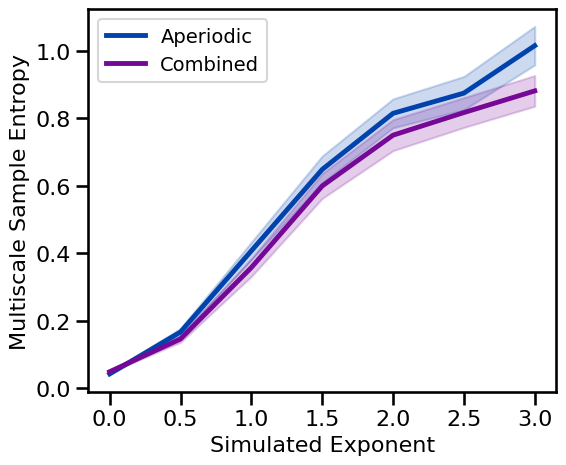

In [25]:
# Plot multiscale sample entropy measures across aperiodic variations
plot_ap_sims(m_sa_sims_exp, m_sa_sims_exp_var, m_sa_sims_comb, m_sa_sims_exp_comb_var,
             'Multiscale Sample Entropy', save_fig=SAVE_FIG, 
             file_name='m_sa_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [26]:
# Run simulations calculating multiscale sample entropy across oscillation frequency
m_sa_sims_freq, m_sa_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_sample_entropy, 
    MULTI_SA_ENT_PARAMS, 'update_freq', FREQS, N_SIMS)

In [27]:
# Run simulations calculating multiscale sample entropy across oscillation power
m_sa_sims_pow, m_sa_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_sample_entropy, 
    MULTI_SA_ENT_PARAMS, 'update_pow', POWERS, N_SIMS)

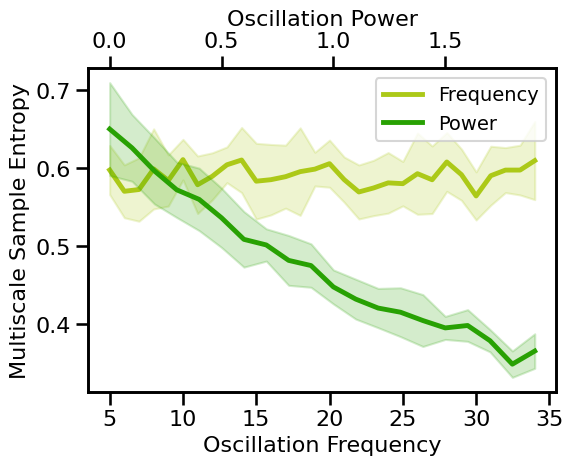

In [28]:
# Plot multiscale approximate sample measures across aperiodic variations
plot_pe_sims(m_sa_sims_freq, m_sa_sims_freq_var, m_sa_sims_pow, m_sa_sims_pow_var,
             'Multiscale Sample Entropy', save_fig=SAVE_FIG, 
             file_name='m_sa_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [29]:
# Run simulations calculating multiscale sample entropy across timescales
m_sa_sims_knee, m_sa_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, multi_sample_entropy, 
    MULTI_SA_ENT_PARAMS, 'update_knee', KNEES, N_SIMS)

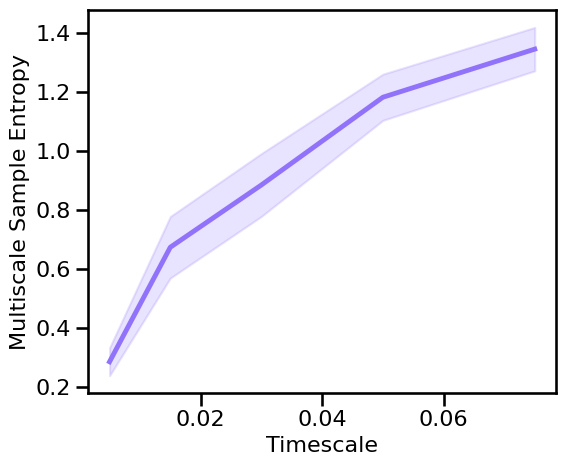

In [30]:
# Plot multiscale sample entropy across different timescales
plot_sims(KNEES, m_sa_sims_knee, m_sa_sims_knee_var,
          'Timescale', 'Multiscale Sample Entropy', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='m_sa_knee' + EXT, file_path=FIGPATH)

#### Peak Variations

In [31]:
# Run simulations calculating multiscale sample entropy across peak bandwidths (sims from file)
m_sa_sims_bw, m_sa_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', multi_sample_entropy, MULTI_SA_ENT_PARAMS)

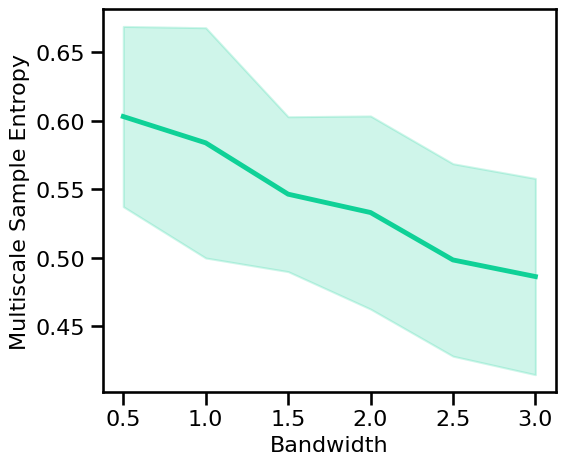

In [32]:
# Plot multiscale sample entropy across peak bandwidth
plot_sims(BWS, m_sa_sims_bw, m_sa_sims_bw_var,
          'Bandwidth', 'Multiscale Sample Entropy', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='m_sa_bw' + EXT, file_path=FIGPATH)

## Multiscale Permutation Entropy

#### Aperiodic Variations

In [33]:
# Run simulations calculating multiscale permutation entropy across exponents
m_pe_sims_exp, m_pe_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, multi_perm_entropy, 
    MULTI_PE_ENT_PARAMS, 'update_exp', EXPS, N_SIMS)

In [34]:
# Run simulations calculating multiscale permutation entropy across exponents, with an oscillation
m_pe_sims_comb, m_pe_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_perm_entropy, 
    MULTI_PE_ENT_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

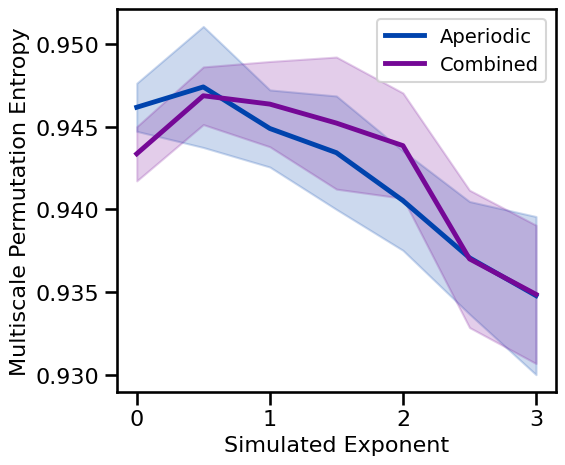

In [35]:
# Plot multiscale permutation entropy measures across aperiodic variations
plot_ap_sims(m_pe_sims_exp, m_pe_sims_exp_var, m_pe_sims_comb, m_pe_sims_exp_comb_var,
             'Multiscale Permutation Entropy', save_fig=SAVE_FIG, 
             file_name='m_pe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [36]:
# Run simulations calculating multiscale permutation entropy across oscillation frequency
m_pe_sims_freq, m_pe_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_perm_entropy, 
    MULTI_PE_ENT_PARAMS, 'update_freq', FREQS, N_SIMS)

In [37]:
# Run simulations calculating multiscale permutation entropy across oscillation power
m_pe_sims_pow, m_pe_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_perm_entropy, 
    MULTI_PE_ENT_PARAMS, 'update_pow', POWERS, N_SIMS)

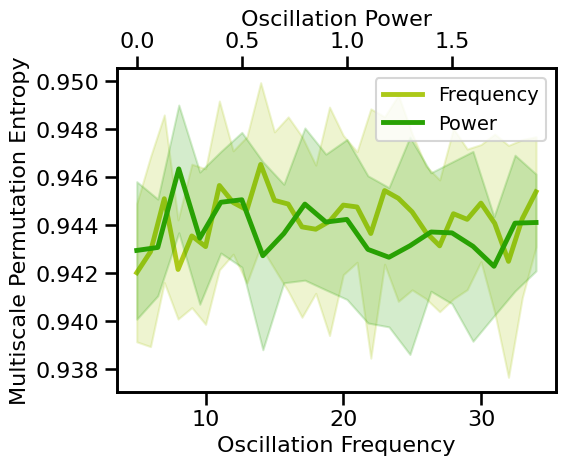

In [38]:
# Plot multiscale permutation entropy measures across aperiodic variations
plot_pe_sims(m_pe_sims_freq, m_pe_sims_freq_var, m_pe_sims_pow, m_pe_sims_pow_var,
             'Multiscale Permutation Entropy', save_fig=SAVE_FIG, 
             file_name='m_pe_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [39]:
# Run simulations calculating multiscale permutation entropy across timescales
m_pe_sims_knee, m_pe_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, multi_perm_entropy, 
    MULTI_PE_ENT_PARAMS, 'update_knee', KNEES, N_SIMS)

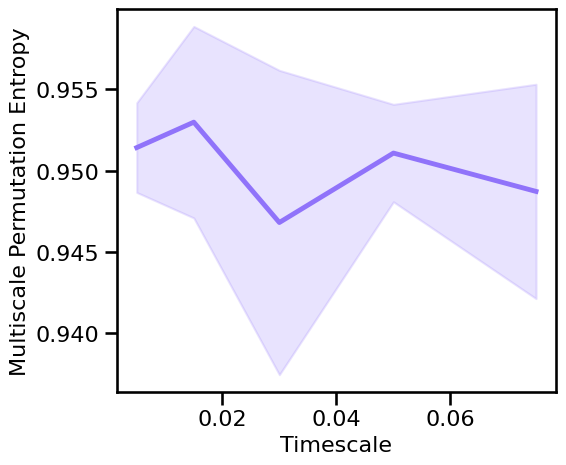

In [40]:
# Plot multiscale permutation entropy across different timescales
plot_sims(KNEES, m_pe_sims_knee, m_pe_sims_knee_var,
          'Timescale', 'Multiscale Permutation Entropy', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='m_pe_knee' + EXT, file_path=FIGPATH)

#### Peak Variations

In [41]:
# Run simulations calculating multiscale permutation entropy across peak bandwidths (sims from file)
m_pe_sims_bw, m_pe_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', multi_perm_entropy, MULTI_PE_ENT_PARAMS)

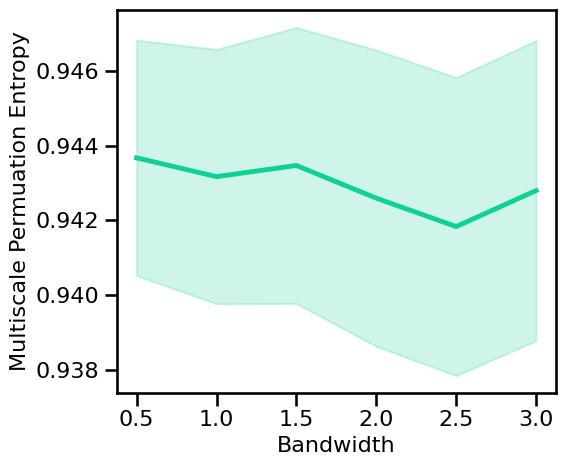

In [42]:
# Plot multiscale permutation entropy across peak bandwidth
plot_sims(BWS, m_pe_sims_bw, m_pe_sims_bw_var,
          'Bandwidth', 'Multiscale Permuation Entropy', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='m_pe_bw' + EXT, file_path=FIGPATH)

## Multiscale Weighted Permutation Entropy

#### Aperiodic Variations

In [43]:
# Run simulations calculating multiscale weighted permutation entropy across exponents
m_wpe_sims_exp, m_wpe_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, multi_wperm_entropy, 
    MULTI_WPE_ENT_PARAMS, 'update_exp', EXPS, N_SIMS)

In [44]:
# Run simulations calculating multiscale weighted permutation entropy across exponents, with an oscillation
m_wpe_sims_comb, m_wpe_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_wperm_entropy, 
    MULTI_WPE_ENT_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

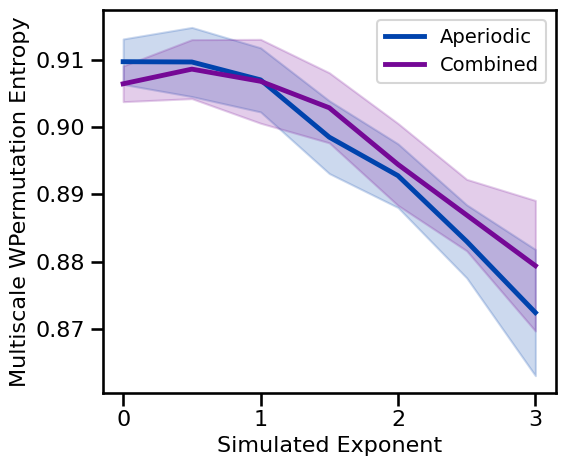

In [45]:
# Plot multiscale weighted permutation entropy measures across aperiodic variations
plot_ap_sims(m_wpe_sims_exp, m_wpe_sims_exp_var, m_wpe_sims_comb, m_wpe_sims_exp_comb_var,
             'Multiscale WPermutation Entropy', save_fig=SAVE_FIG, 
             file_name='m_wpe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [46]:
# Run simulations calculating multiscale weighted permutation entropy across oscillation frequency
m_wpe_sims_freq, m_wpe_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_wperm_entropy, 
    MULTI_AP_ENT_PARAMS, 'update_freq', FREQS, N_SIMS)

In [47]:
# Run simulations calculating multiscale weighted permutation entropy across oscillation power
m_wpe_sims_pow, m_wpe_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, multi_wperm_entropy, 
    MULTI_AP_ENT_PARAMS, 'update_pow', POWERS, N_SIMS)

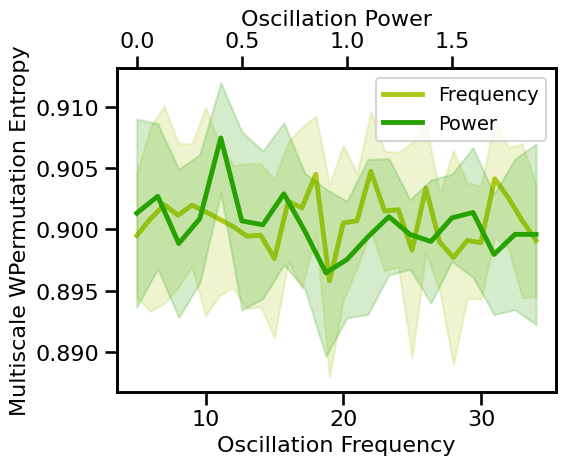

In [48]:
# Plot multiscale weighted permutation entropy measures across aperiodic variations
plot_pe_sims(m_wpe_sims_freq, m_wpe_sims_freq_var, m_wpe_sims_pow, m_wpe_sims_pow_var,
             'Multiscale WPermutation Entropy', save_fig=SAVE_FIG, 
             file_name='m_wpe_pe' + EXT, file_path=FIGPATH)

#### Knee Variations

In [49]:
# Run simulations calculating multiscale weighted permutation entropy across timescales
m_wpe_sims_knee, m_wpe_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, multi_wperm_entropy, 
    MULTI_WPE_ENT_PARAMS, 'update_knee', KNEES, N_SIMS)

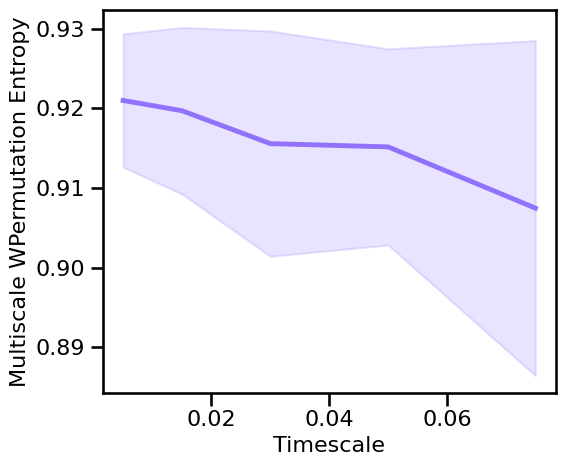

In [50]:
# Plot multiscale weighted permutation entropy across different timescales
plot_sims(KNEES, m_wpe_sims_knee, m_wpe_sims_knee_var,
          'Timescale', 'Multiscale WPermutation Entropy', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='m_wpe_knee' + EXT, file_path=FIGPATH)

#### Peak Variations

In [51]:
# Run simulations calculating multiscale weighted permutation entropy across peak bandwidths (sims from file)
m_wpe_sims_bw, m_wpe_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', multi_wperm_entropy, MULTI_WPE_ENT_PARAMS)

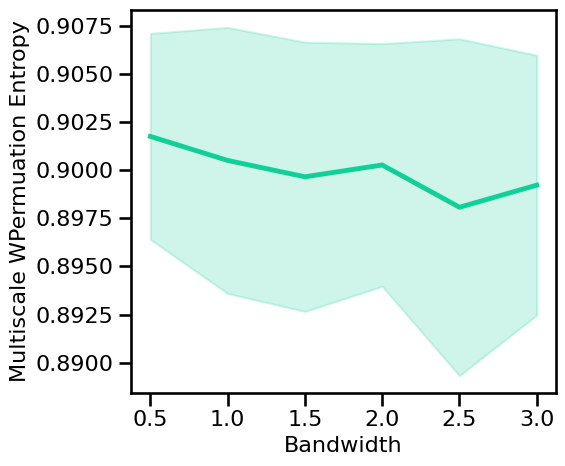

In [52]:
# Plot multiscale weighted permutation entropy across peak bandwidth
plot_sims(BWS, m_wpe_sims_bw, m_wpe_sims_bw_var,
          'Bandwidth', 'Multiscale WPermuation Entropy', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='m_wpe_bw' + EXT, file_path=FIGPATH)

## Conclusions

From these simulations we can see that:
- for multiscale approximate and sample entropy, measures tend to increase with increasing aperiodic exponent
- for multiscale permutation and weighted permutation entropy, measures tend to decrease with increasing aperiodic exponent
- estimates of multiscale entropy tend to be quite stable across variations of oscillation frequency and power